In [1]:
import pygmo as pg
import numpy as np
import pandas as pd
import plotly.express as px


import re
import ast
def str2array(s):
    # Remove space after [
    s=re.sub('\[ +', '[', s.strip())
    # Replace commas and spaces
    s=re.sub('[,\s]+', ', ', s)
    return np.array(ast.literal_eval(s))

In [2]:
path = "./data/hypermapper/ZDT4_orzww20_output_samples.csv"
df = pd.read_csv(path).reset_index(level=0)
df

,index,f1,x2,f2,Timestamp,x1
0,0,0.964929,-2.587095,9.551426,4,0.964929
1,1,0.707326,4.322825,30.752567,4,0.707326
2,2,0.373777,-3.015572,8.323882,4,0.373777
3,3,0.000669,3.022992,10.468949,4,0.000669
4,4,0.482172,-2.436032,7.799576,4,0.482172
...,...,...,...,...,...,...
995,995,0.341564,0.492962,0.620342,6566578,0.341564
996,996,0.126721,0.489384,0.918072,6573485,0.126721
997,997,0.574403,0.486648,0.487819,6581004,0.574403
998,998,0.007759,0.490528,1.210494,6589446,0.007759


In [3]:
df[['f1', 'f2']]

,f1,f2
0,0.964929,9.551426
1,0.707326,30.752567
2,0.373777,8.323882
3,0.000669,10.468949
4,0.482172,7.799576
...,...,...
995,0.341564,0.620342
996,0.126721,0.918072
997,0.574403,0.487819
998,0.007759,1.210494


In [57]:
def get_hyper(obj_2d):
    if len(obj_2d)<2:
        return 0
#     ref_point = np.amax(obj_2d, axis=0).tolist()
    ref_point = [1.0, 43.42528644496515]
    hypervolume = pg.hypervolume(obj_2d).compute(ref_point)
    return hypervolume

obj = [i.tolist() for i in df[['f1', 'f2']].values]

df["hypervolume"] = [get_hyper(obj[:i+1]) for i in range(len(df))]

In [58]:
df

,index,f1,x2,f2,Timestamp,x1,hypervolume
0,0,0.964929,-2.587095,9.551426,4,0.964929,0.000000
1,1,0.707326,4.322825,30.752567,4,0.707326,4.452537
2,2,0.373777,-3.015572,8.323882,4,0.373777,21.981306
3,3,0.000669,3.022992,10.468949,4,0.000669,34.277588
4,4,0.482172,-2.436032,7.799576,4,0.482172,34.549088
...,...,...,...,...,...,...,...
995,995,0.341564,0.492962,0.620342,6566578,0.341564,42.923299
996,996,0.126721,0.489384,0.918072,6573485,0.126721,42.923299
997,997,0.574403,0.486648,0.487819,6581004,0.574403,42.923299
998,998,0.007759,0.490528,1.210494,6589446,0.007759,42.923299


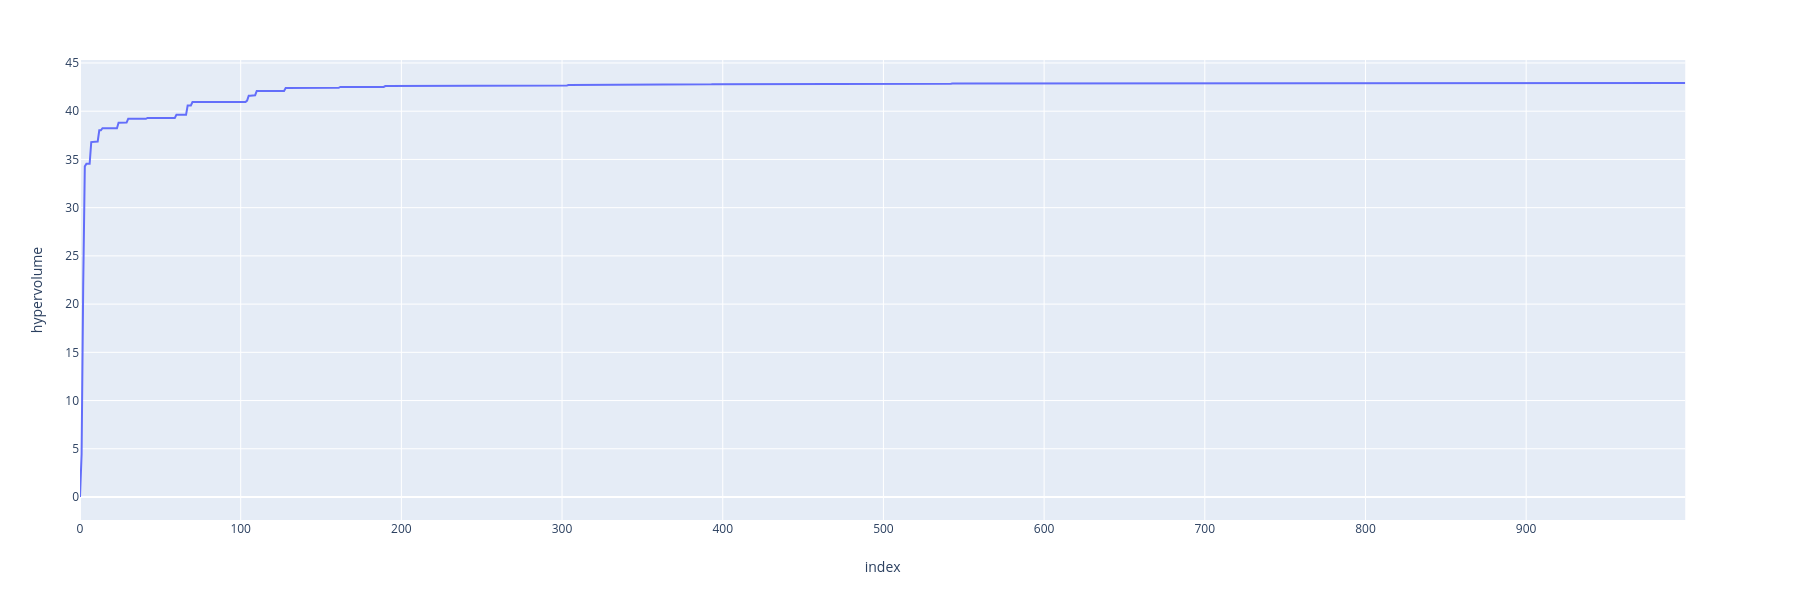

In [59]:
px.line(df, x="index", y="hypervolume", render_mode="svg")

In [60]:
path = "./data/tutor model/static_sampling/ZDT4_2_plan_tutor_loop.139842832143376.csv"
tut = pd.read_csv(path)
tut['prediction'] = tut['prediction'].apply(str2array)

array([[ 5.10992379e-01, -5.00455629e-01],
       [ 1.23916188e-01, -5.18100881e-04],
       [ 4.32333525e-01, -3.49056510e-04],
       [ 7.88756944e-07,  1.01398896e-01],
       [ 4.64270199e-02,  7.16688027e-04],
       [ 5.19411493e-01, -5.07074124e-01],
       [ 3.71432437e-01,  1.52224300e-03],
       [ 1.35511125e-01, -5.03404027e-04],
       [ 1.18539713e-02, -5.03404027e-04],
       [ 1.84003305e-01,  8.06430144e-05],
       [ 2.37900836e-02, -1.69381025e-04],
       [ 2.58337109e-01, -4.46313360e-04],
       [ 7.88756944e-07,  2.42859603e-02],
       [ 6.27100264e-01, -5.22846995e-01],
       [ 1.73837360e-01, -4.63019157e-04],
       [ 6.16998353e-02,  2.75824398e-04],
       [ 2.68829913e-01,  1.11515420e-04],
       [ 5.61404570e-01, -5.11286913e-01],
       [ 6.22747741e-01, -5.22846995e-01],
       [ 9.70652947e-04,  1.01975608e-04],
       [ 4.42965486e-01, -5.53096375e-04],
       [ 5.24671301e-01, -5.06280393e-01],
       [ 5.42517010e-01, -5.08812544e-01],
       [ 6.

In [66]:
DIM = 2
ID = 4
OBJ = 2

# --- Problem
# udp = pg.wfg(prob_id=ID, dim_dvs=DIM, dim_obj=OBJ, dim_k=OBJ-1)
udp = pg.zdt(prob_id=ID, param=DIM)
pro = pg.problem(udp)

samples_x = [np.concatenate(tut['prediction'].values[:i+1], axis=0) for i in range(len(tut))]
samples_y = [[pro.fitness(p).tolist() for p in X] for X in samples_x]   

samples_hyp = [get_hyper(obj) for obj in samples_y]

In [65]:
pop = pg.population(pro, size=100, seed=214)
# algo1 = pg.algorithm(pg.moead(gen=1000))
algo2 = pg.algorithm(pg.nsga2(gen=1000))
# pop = algo1.evolve(pop) 
pop = algo2.evolve(pop) 


pg.hypervolume(pop.get_f()).compute([1.0, 43.42528644496515])

43.08579158785999

In [76]:
# combin = pd.DataFrame(np.concatenate(samples_y, axis=0), columns=['tut_f1', 'tut_2'])
# combin.drop_duplicates()

# pg.plot_non_dominated_fronts(np.concatenate(samples_y, axis=0))

tut

,model name,prediction,iteration,problem,objectives,feature_dim,eval_budget,n_pred,solver,solution_comb,...,test_explained_variance,test_neg_mean_squared_error,test_neg_mean_absolute_error,y_index,params hash,id,surr_score,ndf_surr_score,prediction_score,tutor_id
0,sampling plan,"[[0.9140625, 2.578125], [0.6640625, -4.921875]...",1,ZDT4,2,2,900,25,nsga2,ndf_score,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139842832143376
1,"['mlpregressor', 'mlpregressor']","[[0.317322886, -0.146389701], [0.0462182112, 0...",2,ZDT4,2,2,900,25,nsga2,ndf_score,...,"[0.9994791205, 0.5237788221]","[-3.52776e-05, -54.9832754736]","[-0.0037356568, -6.3303147195]","[0, 1]","['703d', '703d']",139841344454416,0.689035,0.883973,5.698764,139842832143376
2,gaussianprocessregressor,"[[1.98216048e-05, 0.0936556863], [0.387679432,...",3,ZDT4,2,2,900,25,nsga2,ndf_score,...,0.7155923748,-20.7532944638,-2.4999670671,all,74fc,5ed95e,0.830834,0.980673,8.512431,139842832143376
3,gaussianprocessregressor,"[[0.509565414, -0.00290166902], [2.34197107e-0...",4,ZDT4,2,2,900,25,nsga2,ndf_score,...,0.7648551758,-17.0186058425,-2.1123603612,all,74fc,5ed95e,0.682611,0.999995,1.099709,139842832143376
4,gaussianprocessregressor,"[[0.510992379, -0.500455629], [0.123916188, -0...",5,ZDT4,2,2,900,25,nsga2,ndf_score,...,0.8314708958,-13.997664966,-1.8017576664,all,74fc,5ed95e,0.766180,0.999997,5.812521,139842832143376
5,gaussianprocessregressor,"[[1.28927367e-06, 0.0142228417], [0.133416735,...",6,ZDT4,2,2,900,25,nsga2,ndf_score,...,0.8873517419,-11.9068715325,-1.432460486,all,74fc,5ed95e,0.859583,0.999998,0.350383,139842832143376
6,gaussianprocessregressor,"[[9.55422159e-07, 0.000120908345], [0.45047943...",7,ZDT4,2,2,900,25,nsga2,ndf_score,...,0.7425118997,-12.6062717924,-1.3557539732,all,74fc,5ed95e,0.693934,0.920607,5.988295,139842832143376
7,gaussianprocessregressor,"[[1.30336166e-06, 0.113714428], [0.147032384, ...",8,ZDT4,2,2,900,25,nsga2,ndf_score,...,0.8435108358,-11.5571402605,-1.324793873,all,74fc,5ed95e,0.865490,0.999996,5.358762,139842832143376
8,gaussianprocessregressor,"[[0.618730557, 0.556069777], [6.66066026e-08, ...",9,ZDT4,2,2,900,25,nsga2,ndf_score,...,0.9019856531,-7.3874217396,-0.9801191815,all,74fc,5ed95e,0.743448,0.999973,6.275479,139842832143376
9,gaussianprocessregressor,"[[0.0462879069, -1.00403189], [0.0500774214, -...",10,ZDT4,2,2,900,25,nsga2,ndf_score,...,0.9019971937,-6.066040221,-0.9652756959,all,74fc,5ed95e,0.868188,1.000000,0.236970,139842832143376


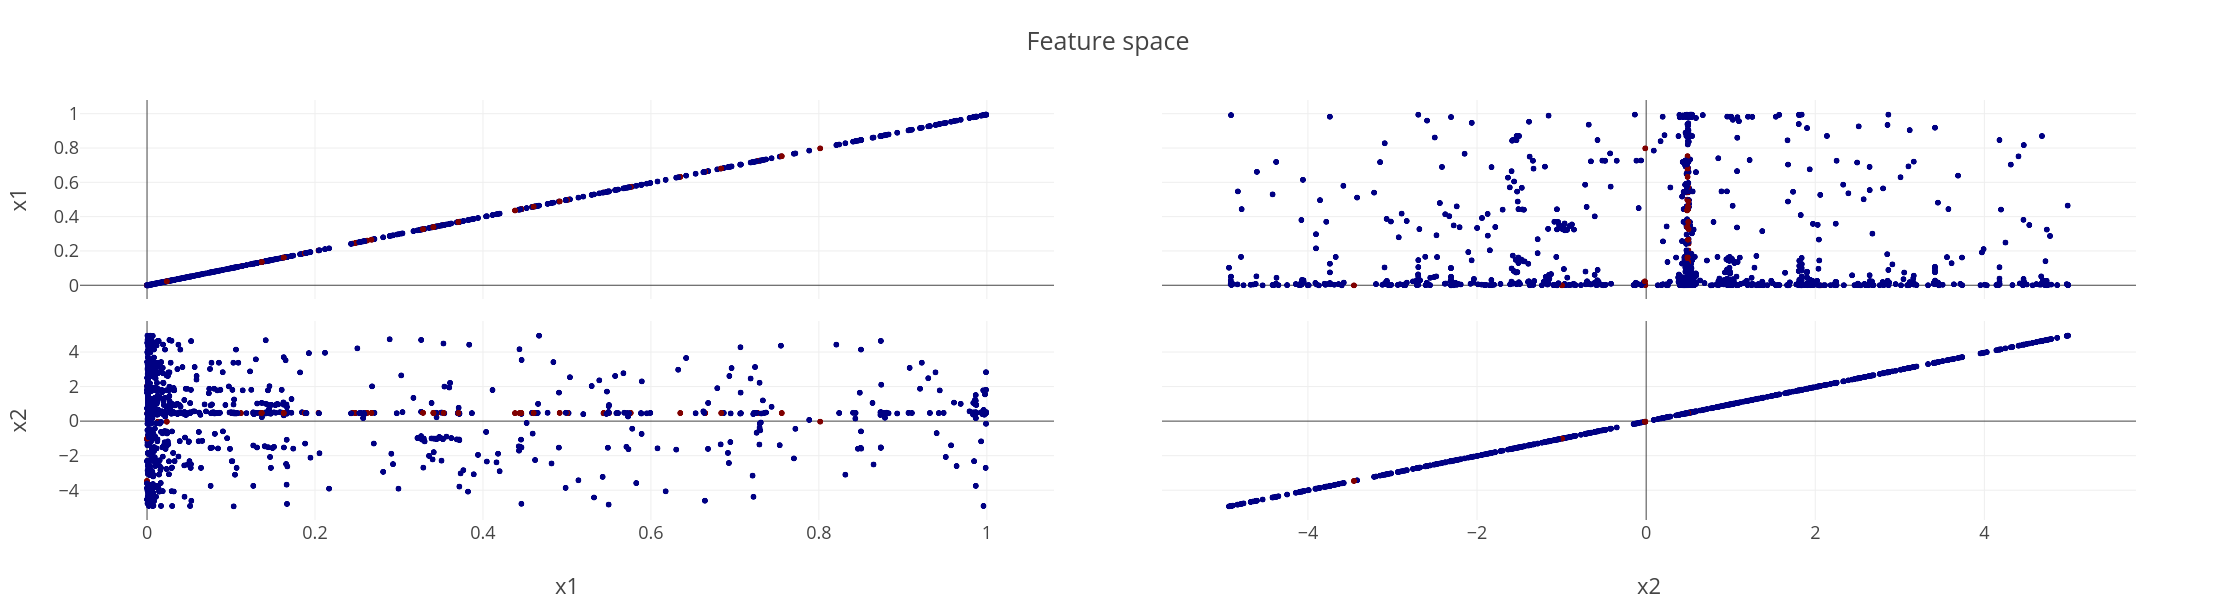

In [8]:
ndf, dl, dc, ndr = pg.fast_non_dominated_sorting(df[['f1','f2']].values)
X_ndf = df[['x1','x2']].copy()
X_ndf['ndf'] = 0
X_ndf.loc[ndf[0],['ndf']] = 1
px.scatter_matrix(X_ndf, template="presentation" , dimensions=['x1', 'x2'], color='ndf', color_continuous_scale='Jet', title="Feature space").update_layout(coloraxis_showscale=False)

In [9]:
y_ndf = df[['f1','f2']].copy()[:900]
y_ndf['ndf'] = 0
y_ndf.loc[ndf[0],['ndf']] = 1
px.scatter_matrix(y_ndf, template="presentation", dimensions=['f1','f2'], color='ndf', color_continuous_scale='Rainbow', title="Objective space").update_layout(coloraxis_showscale=False)

KeyError: '[995, 938, 970, 914, 918, 986, 926] not in index'

In [ ]:
ndf_in_total = 100*(len(ndf[0])/len(df))

print("In total evaluated {} point(s). Non-dominated solutions is {:.1f}% from all dataset".format(len(df), ndf_in_total))
